## Histogram of Oriented Gradients (HOG)

#### Explain how (and identify where in your code) you extracted HOG features from the training images. Explain how you settled on your final choice of HOG parameters.

In [1]:
import cv2
import glob
import numpy as np
import matplotlib.image as mpimg
from random import shuffle
from skimage.feature import hog
from skimage.feature import hog

# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, 
                        vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, 
                                  pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), 
                                  transform_sqrt=True, block_norm="L2-Hys", 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, 
                       pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), 
                       transform_sqrt=True, block_norm="L2-Hys", 
                       visualise=vis, feature_vector=feature_vec)
        return features

# Define a function to compute binned color features  
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# Define a function to compute color histogram features 
# NEED TO CHANGE bins_range if reading .png files with mpimg!
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

# Define a function to extract features from a list of images
# Have this function call bin_spatial() and color_hist()
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):
    # Create a list to append feature vectors to
    features = []
    # Iterate through the list of images
    for file in imgs:
        file_features = []
        # Read in each one by one
        image = mpimg.imread(file)
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
            elif color_space == 'YCrCb':
                feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
        else: feature_image = np.copy(image)      

        if spatial_feat == True:
            spatial_features = bin_spatial(feature_image, size=spatial_size)
            file_features.append(spatial_features)
        if hist_feat == True:
            # Apply color_hist()
            hist_features = color_hist(feature_image, nbins=hist_bins)
            file_features.append(hist_features)
        if hog_feat == True:
        # Call get_hog_features() with vis=False, feature_vec=True
            if hog_channel == 'ALL':
                hog_features = []
                for channel in range(feature_image.shape[2]):
                    hog_features.append(get_hog_features(feature_image[:,:,channel], 
                                        orient, pix_per_cell, cell_per_block, 
                                        vis=False, feature_vec=True))
                hog_features = np.ravel(hog_features)        
            else:
                hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
            # Append the new feature vector to the features list
            file_features.append(hog_features)
        features.append(np.concatenate(file_features))
    # Return list of feature vectors
    return features

# Read in our vehicles and non-vehicles
notcars = glob.glob("./dataset/non-vehicles/**/*.png", recursive=True)
cars = glob.glob("./dataset/vehicles/KITTI_extracted/*.png")
print("There are %i cars and %i non-cars." % (len(cars), len(notcars)))

There are 5966 cars and 8968 non-cars.


In [2]:
import time

color_space = "YCrCb"   # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 13             # HOG orientations
pix_per_cell = 8        # HOG pixels per cell
cell_per_block = 8      # HOG cells per block
hog_channel = "ALL"     # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 32          # Number of histogram bins
spatial_feat = True     # Spatial features on or off
hist_feat = True        # Histogram features on or off
hog_feat = True         # HOG features on or off

print("Extracting features. This may take some time ...")

t1 = time.time()
car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print("Extracted features of %i cars in %.3f seconds" % (len(cars), t2 - t1))

t1 = time.time()
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
t2 = time.time()
print("Extracted features of %i non-cars in %.3f seconds" % (len(notcars), t2 - t1))

Extracting features. This may take some time ...
Extracted features of 5966 cars in 29.423 seconds
Extracted features of 8968 non-cars in 42.786 seconds


#### Describe how (and identify where in your code) you trained a classifier using your selected HOG features (and color features if you used them).

In [3]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print("Training phase, using %i orientations, %i pixels per cell and %i cells per block" %
      (orient, pix_per_cell, cell_per_block))
print("Feature vector length: %i" % len(X_train[0]))
print("This may take some time ...")
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t1 = time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print("Trained SVC in %.3f seconds" % (t2 - t1))
# Check the score of the SVC
print("Test Accuracy of SVC = %.2f %%" % (svc.score(X_test, y_test) * 100))

Training phase, using 13 orientations, 8 pixels per cell and 8 cells per block
Feature vector length: 3360
This may take some time ...
Trained SVC in 15.869 seconds
Test Accuracy of SVC = 99.10 %


## Sliding Window Search

#### Describe how (and identify where in your code) you implemented a sliding window search. How did you decide what scales to search and how much to overlap windows?

In [4]:
import matplotlib.pyplot as plt

# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

# Define a function that takes an image,
# start and stop positions in both x and y, 
# window size (x and y dimensions),  
# and overlap fraction (for both x and y)
def slide_window(img, plane=0, x_overlap=0.5):
    img_width = img.shape[1]
    y_begin = round(220 + plane*48.5 - plane*(plane-1)*3.5)
    xy_window = round(420 - plane*90 + plane*(plane-1)*5.8)
    count = np.int((img_width-xy_window)/((1-x_overlap)*xy_window))
    x_span = np.int((1 + count*x_overlap)*xy_window)
    x_begin = (img_width - x_span)//2
    # Compute the number of pixels per step in x/y
    x_pixels = np.int(xy_window * (1 - x_overlap))
    # Compute the number of windows in x/y
    x_buffer = np.int(xy_window*(x_overlap))
    x_windows = np.int((x_span - x_buffer) / x_pixels)
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x window positions
    for x in range(0, x_windows):
        # Calculate each window position
        x_start = x*x_pixels+x_begin
        y_start = y_begin
        x_end = x_start + xy_window - 1
        y_end = y_start + xy_window - 1
        # Append window position to list
        window_list.append(((x_start, y_start), (x_end, y_end)))
    # Return the list of windows
    return window_list

In [5]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: feature_image = np.copy(img)      
    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = color_hist(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
                        pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows

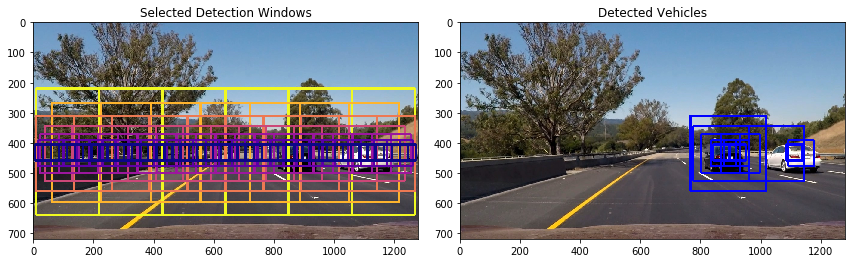

In [6]:
# read test image
image = mpimg.imread("./test_images/test6.jpg")

# create and draw detection windows
image_windows = np.copy(image)
cmap = plt.get_cmap("plasma_r")
num_planes = 7
windows = []
for plane in range(0, num_planes):
    window_list = slide_window(image, plane)
    windows = windows + window_list
    color = cmap(int((plane*255/(num_planes-1))))[:3]
    color = tuple([int(256*x) for x in color])
    image_windows = draw_boxes(image_windows, window_list, color=color, thick=6)

# detect vehicles
image_detection = np.copy(image)
# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
image = image.astype(np.float32)/255
hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

image_detection = draw_boxes(image_detection, hot_windows, color=(0, 0, 255), thick=6)                    

f, ax = plt.subplots(1, 2, figsize=(12, 6))
f.tight_layout()
ax[0].imshow(image_windows)
ax[0].set_title("Selected Detection Windows")
ax[1].imshow(image_detection)
ax[1].set_title("Detected Vehicles")
f.show(False)

#### Show some examples of test images to demonstrate how your pipeline is working. How did you optimize the performance of your classifier?

In [7]:
from scipy.ndimage.measurements import label

def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1

    # Return updated heatmap
    return heatmap# Iterate through list of bboxes
    
def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap <= threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])
        # Define a bounding box based on min/max x and y
        bbox = ((np.min(nonzerox), np.min(nonzeroy)), (np.max(nonzerox), np.max(nonzeroy)))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

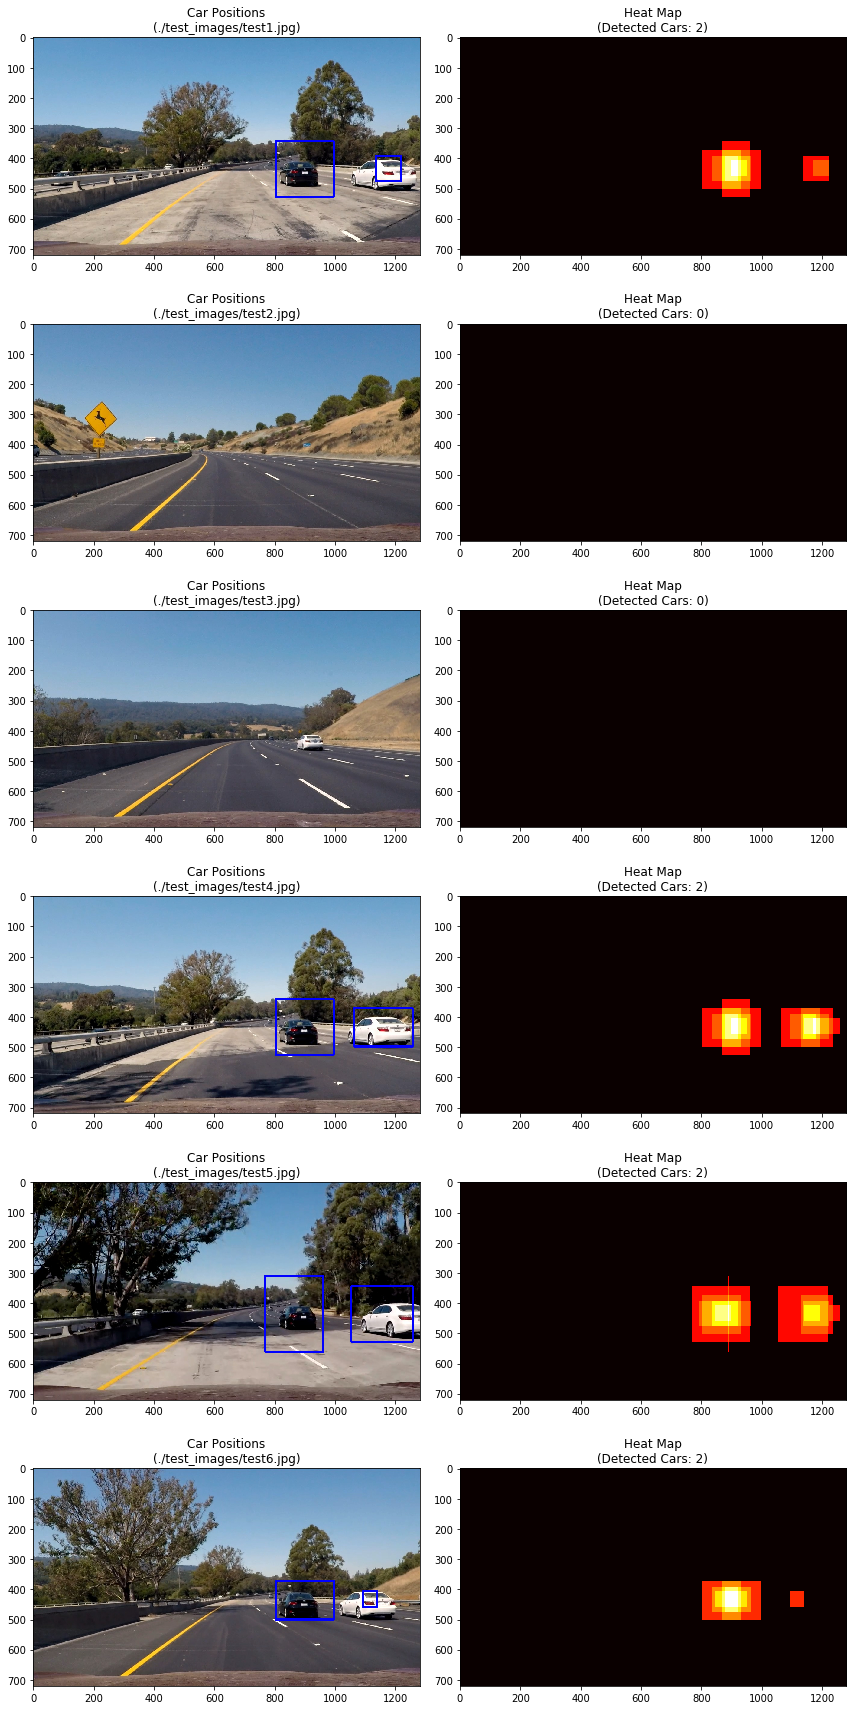

In [8]:
import glob

def pipeline(image, png_scaling = False):

    num_planes = 7
    windows = []
    for plane in range(0, num_planes):
        window_list = slide_window(image, plane)
        windows = windows + window_list
        
    draw_img = np.copy(image)
    if (png_scaling == True):
        # extracted training data from .png images (scaled 0 to 1 by mpimg)
        # and the image you are searching is a .jpg (scaled 0 to 255)
        image = image.astype(np.float32)/255
    
    # detect vehicles
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)    

    # Add heat to each box in box list
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    heatmap = add_heat(heatmap, hot_windows)

    # Apply threshold to help remove false positives
    heatmap = apply_threshold(heatmap, 2)

    # Find final boxes from heatmap using label function
    labels = label(heatmap)
    draw_img = draw_labeled_bboxes(draw_img, labels)

    return(draw_img, heatmap, labels)

# Read in and make a list of test images
file_list = glob.glob("./test_images/*.jpg")

f, ax = plt.subplots(len(file_list), 2, figsize=(12, 4*len(file_list)))
i = 0

for file_name in sorted(file_list):

    # call processing pipeline
    draw_img, heatmap, labels = pipeline(mpimg.imread(file_name), png_scaling=True)
    
    # draw images
    ax[i][0].imshow(draw_img)
    ax[i][0].set_title("Car Positions\n(%s)" % file_name)
    ax[i][1].imshow(heatmap, cmap='hot')
    ax[i][1].set_title("Heat Map\n(Detected Cars: %i)" % labels[1])
    i = i + 1

f.tight_layout()
f.show(False)

## Video Implementation

#### Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (somewhat wobbly or unstable bounding boxes are ok as long as you are identifying the vehicles most of the time with minimal false positives.)

In [9]:
from moviepy.editor import VideoFileClip
from collections import deque

heatmaps = deque(maxlen = 8)

def process_image(image):
    global heatmaps
    
    num_planes = 7
    windows = []
    for plane in range(0, num_planes):
        window_list = slide_window(image, plane)
        windows = windows + window_list
        
    draw_img = np.copy(image)
    # extracted training data from .png images (scaled 0 to 1 by mpimg)
    # and the image you are searching is a .jpg (scaled 0 to 255)
    image = image.astype(np.float32)/255
    
    # detect vehicles and create frame heatmap
    hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)    

    # Add heat to each box in box list
    heatmap = np.zeros_like(image[:,:,0]).astype(np.float)
    heatmap = add_heat(heatmap, hot_windows)

    # Apply threshold to help remove false positives
    heatmap = apply_threshold(heatmap, 1)

    # Calculate average heat over several frames
    heatmaps.append(heatmap)
    if (len(heatmaps) == heatmaps.maxlen):
        heat_mean = np.zeros_like(image[:,:,0]).astype(np.float)
        for idx, heatmap in enumerate(heatmaps):
            heat_mean = heat_mean + heatmap
        # Apply threshold to help remove false positives
        # Threshold value of 2 was ok for single frame, so if we now want to see
        # a car detected in at least 50% of consecutive frames, we have to use a
        # threshold value of 2 * 50% * frame count, which is heatmaps.maxlen
        heat_mean = apply_threshold(heat_mean, heatmaps.maxlen)        
        # Find final boxes from heatmap using label function
        labels = label(heat_mean)
        draw_img = draw_labeled_bboxes(draw_img, labels)
        cv2.putText(draw_img, "Vehicles: %i" % labels[1], (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1.5, (64,255,255), 4)
    
    return(draw_img)

clip_in = VideoFileClip("project_video.mp4")
clip_out = clip_in.fl_image(process_image)
%time clip_out.write_videofile("project_video_final.mp4", audio=False)

[MoviePy] >>>> Building video project_video_final.mp4
[MoviePy] Writing video project_video_final.mp4


100%|█████████▉| 1260/1261 [12:44<00:00,  1.64it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: project_video_final.mp4 

CPU times: user 12min 35s, sys: 4.12 s, total: 12min 39s
Wall time: 12min 46s


#### Describe how (and identify where in your code) you implemented some kind of filter for false positives and some method for combining overlapping bounding boxes.

## Discussion

#### Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?